# SUPPORT VECTOR MACHINE

# Dataset Selection:
For this assignment, we'll utilize the widely recognized Mushroom Dataset


# Task 1: Exploratory Data Analysis (EDA)

In [1]:
#import the pakage
import pandas as pd

In [3]:
# Read the Mushroom dataset
mushroom_data = pd.read_csv('mushroom.csv')
# Rename the unnamed column
mushroom_data = mushroom_data.rename(columns={'Unnamed: 0': 'mushroom_id'})

# Get an overview of the dataset
print("Mushroom Dataset Overview:")
print(mushroom_data.head())
print("\nDataset Information:")
print(mushroom_data.info())
print("\nSummary Statistics:")
print(mushroom_data.describe())
# Separate numerical and categorical columns
numerical_cols = mushroom_data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = mushroom_data.select_dtypes(include=['object']).columns
# Correlation matrix for numerical columns
correlation_matrix = mushroom_data[numerical_cols].corr()
print("\nCorrelation Matrix for Numerical Columns:")
print(correlation_matrix)

Mushroom Dataset Overview:
   mushroom_id cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0         1167    sunken       scaly     white      no  anise      descending   
1         1037    sunken     fibrous       red      no  anise         notched   
2          309      flat     grooves    purple     yes   foul      descending   
3          282      bell       scaly      pink     yes  fishy         notched   
4          820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type spor

# Task 2: Data Preprocessing

In [6]:
#import the new pakage

In [8]:
from sklearn.preprocessing import LabelEncoder

In [10]:
# Apply LabelEncoder to categorical columns
le = LabelEncoder()
mushroom_data[categorical_cols] = mushroom_data[categorical_cols].apply(le.fit_transform)

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X = mushroom_data.drop('class', axis=1) #Features
y = mushroom_data['class']              #Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Task 3: Data Visualization

In [13]:
#import the python neccessary lybraries

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

Feature Distributions using Density Plots


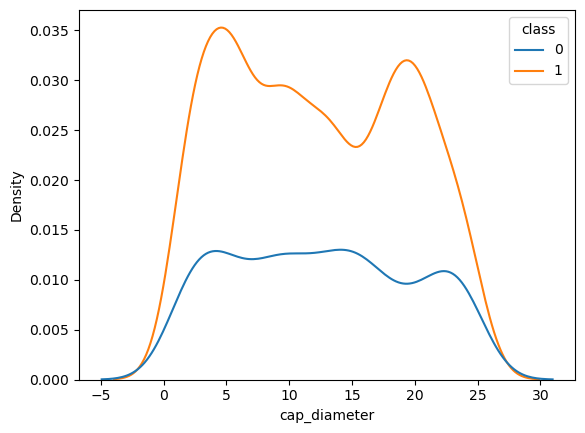


Relationships using pair plots


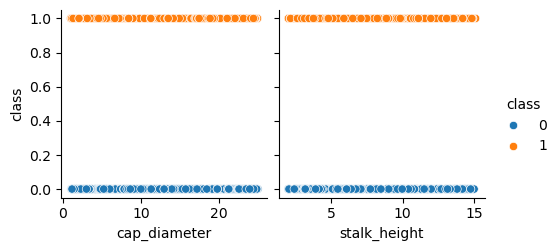

In [16]:
# Visualize feature distributions using density plots
print("Feature Distributions using Density Plots")
sns.kdeplot(data=mushroom_data, x="cap_diameter", hue="class")
plt.show()

# Visualize feature relationships using pair plots
print("\nRelationships using pair plots")
sns.pairplot(mushroom_data, x_vars=["cap_diameter", "stalk_height"], y_vars="class", hue="class")
plt.show()

# Task 4: SVM Implementation

In [19]:
#import the neccessary pakages

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [24]:
# Create an SVM classifier with a linear kernel
svm = SVC(kernel='linear', C=1.0, random_state=42)

# Train the SVM model on the training data
svm.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred = svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

Accuracy: 0.6675
Precision: 0.6675
Recall: 1.0
F1-score: 0.800599700149925


# Task 5: Visualization of SVM Results

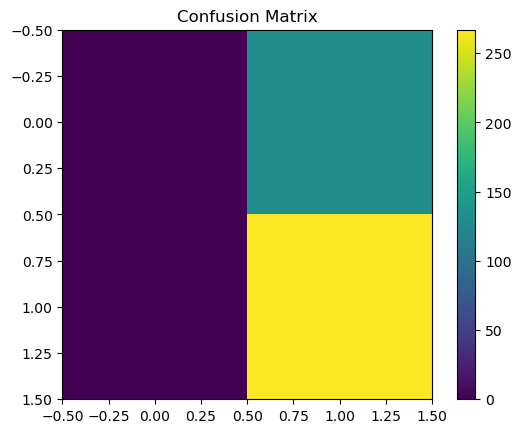

In [25]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
plt.show()

# Task 6: Parameter Tuning and Optimization

In [27]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np

# Define the hyperparameter grid
param_grid = {'kernel': ['linear', 'poly', 'rbf'], 'C': np.logspace(-2, 2, 5)} # # np.logspace(-2, 2, 5)Output: [1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]==[0.01, 0.1, 1.0, 10.0, 100.0]

# Use RandomizedSearchCV instead of GridSearchCV
# n_iter controls the number of random combinations to try
random_search = RandomizedSearchCV(svm, param_distributions=param_grid, n_iter=10, cv=3, scoring='accuracy',random_state=42)
random_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

Best hyperparameters: {'kernel': 'rbf', 'C': 10.0}
Best score: 0.708125162496223


# Task 7: Comparison and Analysis

In [34]:
# Train and evaluate SVM models with different kernels
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    svm = SVC(kernel=kernel, C=1.0, random_state=42)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    print(f"Kernel: {kernel}, Accuracy: {accuracy_score(y_test, y_pred)}")

Kernel: linear, Accuracy: 0.6675
Kernel: poly, Accuracy: 0.6675
Kernel: rbf, Accuracy: 0.6675


# SVM Strengths for the Mushroom Dataset:
* Handling High-Dimensional Data,Non-Linear Classification,Robustness to Noise,High Accuracy.

# SVM Weaknesses for the Mushroom Dataset:
* Computational Complexity,Overfitting,Hyperparameter Tuning,Interpretability.